In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, LSTM, Reshape
from keras.utils import to_categorical
from keras.datasets import mnist


In [2]:
#Download MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Pre-process Data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)


In [8]:
#Define function
def store_metrics(model_name, accuracy, training_time, roc_auc, f1, precision, recall, fpr, fnr, sensitivity, specificity, dice_coefficient):
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Training Time': training_time,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'False Positive Rate (FPR)': fpr,
        'False Negative Rate (FNR)': fnr,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Dice Coefficient (IoU)': dice_coefficient
    }


In [49]:
# Building CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

# Compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training CNN Model
start_time = time.time()
cnn_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))
training_time_cnn = time.time() - start_time

# Evaluating CNN Model
y_pred_cnn = cnn_model.predict(X_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)

# Check the shape of y_test
print("Shape of y_test:", y_test.shape)

# Calculate metrics for CNN Model
if y_test.ndim == 2:  # Check if y_test is one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)
else:  # y_test is not one-hot encoded
    y_test_classes = y_test

accuracy_cnn = accuracy_score(y_test_classes, y_pred_classes_cnn)
roc_auc_cnn = roc_auc_score(y_test_classes, y_pred_cnn, multi_class='ovr')
f1_cnn = f1_score(y_test_classes, y_pred_classes_cnn, average='weighted')
precision_cnn = precision_score(y_test_classes, y_pred_classes_cnn, average='weighted')
recall_cnn = recall_score(y_test_classes, y_pred_classes_cnn, average='weighted')

# Confusion matrix for FPR and FNR
cm_cnn = confusion_matrix(y_test_classes, y_pred_classes_cnn)

# Initialize FPR and FNR
fpr_cnn = None
fnr_cnn = None
sensitivity_cnn = None
specificity_cnn = None
dice_coefficient_cnn = None

# Check if the confusion matrix has the correct shape for binary classification
if cm_cnn.size == 4:  # Only works for binary classification
    tn_cnn, fp_cnn, fn_cnn, tp_cnn = cm_cnn.ravel()

    # Calculate FPR and FNR
    fpr_cnn = fp_cnn / (fp_cnn + tn_cnn) if (fp_cnn + tn_cnn) > 0 else 0
    fnr_cnn = fn_cnn / (fn_cnn + tp_cnn) if (fn_cnn + tp_cnn) > 0 else 0

    # Calculate Sensitivity và Specificity
    sensitivity_cnn = tp_cnn / (tp_cnn + fn_cnn) if (tp_cnn + fn_cnn) > 0 else 0
    specificity_cnn = tn_cnn / (tn_cnn + fp_cnn) if (tn_cnn + fp_cnn) > 0 else 0

    # Calculate Dice Coefficient
    dice_coefficient_cnn = (2 * tp_cnn) / (2 * tp_cnn + fp_cnn + fn_cnn) if (2 * tp_cnn + fp_cnn + fn_cnn) > 0 else 0
else:
    # If multi-class, calculate average metrics or set them to None
    fpr_cnn = None 
    fnr_cnn = None 
    sensitivity_cnn = None  
    specificity_cnn = None  
    dice_coefficient_cnn = None

# Saving CNN result using the store_metrics function
cnn_metrics = store_metrics(
    model_name="CNN",
    accuracy=accuracy_cnn,
    training_time=training_time_cnn,
    roc_auc=roc_auc_cnn,
    f1=f1_cnn,
    precision=precision_cnn,
    recall=recall_cnn,
    fpr=fpr_cnn,
    fnr=fnr_cnn,
    sensitivity=sensitivity_cnn,
    specificity=specificity_cnn,
    dice_coefficient=dice_coefficient_cnn
)

# Display CNN metrics
print(cnn_metrics)

Epoch 1/5


c:\Users\truon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8549 - loss: 0.5087 - val_accuracy: 0.9493 - val_loss: 0.1803
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9608 - loss: 0.1393 - val_accuracy: 0.9716 - val_loss: 0.1020
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9770 - loss: 0.0815 - val_accuracy: 0.9758 - val_loss: 0.0837
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9824 - loss: 0.0639 - val_accuracy: 0.9761 - val_loss: 0.0840
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9862 - loss: 0.0476 - val_accuracy: 0.9778 - val_loss: 0.0759
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of y_test: (10000,)
{'Model': 'CNN', 'Accuracy': 0.9796, 'Training Time': 43.19586539268494, 'ROC AUC': 0.9996356391413956, 'F1 Score': 0.9795733741112779, 'Precision': 0.9796538288863087, 'Recall': 0.9796, 'False Positive Rate (FPR)': None, 'False Negative Rate (FNR)': None, 'Sensitivity': None, 'Specificity': None, 'Dic

In [50]:
# Flatten the images for MLP
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Reshape to (num_samples, 784)
X_val_flat = X_val.reshape(X_val.shape[0], -1)        # Reshape to (num_samples, 784)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Reshape to (num_samples, 784)

# One-hot encode y_train and y_val if they are not already
if y_train.ndim == 1:  # If not already one-hot encoded
    y_train = to_categorical(y_train, num_classes=10)
if y_val.ndim == 1:  # If not already one-hot encoded
    y_val = to_categorical(y_val, num_classes=10)

# Check shapes
print(f"X_train shape: {X_train_flat.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val_flat.shape}, y_val shape: {y_val.shape}")

# Building MLP Model
mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_shape=(784,)))  # Assuming input shape for flattened 28x28 images
mlp_model.add(Dense(10, activation='softmax'))

# Compiling the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training MLP Model
start_time = time.time()
mlp_model.fit(X_train_flat, y_train, epochs=5, batch_size=128, validation_data=(X_val_flat, y_val))
training_time_mlp = time.time() - start_time

# Evaluating MLP Model
y_pred_mlp = mlp_model.predict(X_test_flat)
y_pred_classes_mlp = np.argmax(y_pred_mlp, axis=1)

# Check the shape of y_test
print("Shape of y_test:", y_test.shape)

# Calculate metrics for MLP Model
if y_test.ndim == 2:  # Check if y_test is one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)
else:  # y_test is not one-hot encoded
    y_test_classes = y_test

# Calculate accuracy, ROC AUC, F1, Precision, and Recall
accuracy_mlp = accuracy_score(y_test_classes, y_pred_classes_mlp)
roc_auc_mlp = roc_auc_score(y_test_classes, y_pred_mlp, multi_class='ovr')
f1_mlp = f1_score(y_test_classes, y_pred_classes_mlp, average='weighted')
precision_mlp = precision_score(y_test_classes, y_pred_classes_mlp, average='weighted')
recall_mlp = recall_score(y_test_classes, y_pred_classes_mlp, average='weighted')

# Confusion matrix for FPR and FNR
cm_mlp = confusion_matrix(y_test_classes, y_pred_classes_mlp)

# Initialize FPR and FNR
fpr_mlp = None
fnr_mlp = None
sensitivity_mlp = None
specificity_mlp = None
dice_coefficient_mlp = None

# Check if the confusion matrix has the correct shape for binary classification
if cm_mlp.size == 4:  # Only works for binary classification
    tn_mlp, fp_mlp, fn_mlp, tp_mlp = cm_mlp.ravel()

    # Calculate FPR and FNR
    fpr_mlp = fp_mlp / (fp_mlp + tn_mlp) if (fp_mlp + tn_mlp) > 0 else 0
    fnr_mlp = fn_mlp / (fn_mlp + tp_mlp) if (fn_mlp + tp_mlp) > 0 else 0

    # Calculate Sensitivity và Specificity
    sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp) if (tp_mlp + fn_mlp) > 0 else 0
    specificity_mlp = tn_mlp / (tn_mlp + fp_mlp) if (tn_mlp + fp_mlp) > 0 else 0

    # Calculate Dice Coefficient
    dice_coefficient_mlp = (2 * tp_mlp) / (2 * tp_mlp + fp_mlp + fn_mlp) if (2 * tp_mlp + fp_mlp + fn_mlp) > 0 else 0
else:
    # If multi-class, set metrics to None or handle accordingly
    fpr_mlp = None
    fnr_mlp = None
    sensitivity_mlp = None
    specificity_mlp = None
    dice_coefficient_mlp = None

# Saving MLP result using the store_metrics function
mlp_metrics = store_metrics(
    model_name="MLP",
    accuracy=accuracy_mlp,
    training_time=training_time_mlp,
    roc_auc=roc_auc_mlp,
    f1=f1_mlp,
    precision=precision_mlp,
    recall=recall_mlp,
    fpr=fpr_mlp,
    fnr=fnr_mlp,
    sensitivity=sensitivity_mlp,
    specificity=specificity_mlp,
    dice_coefficient=dice_coefficient_mlp
)

# Display MLP metrics
print(mlp_metrics)

X_train shape: (48000, 784), y_train shape: (48000, 10)
X_val shape: (12000, 784), y_val shape: (12000, 10)
Epoch 1/5


c:\Users\truon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8087 - loss: 0.6791 - val_accuracy: 0.9353 - val_loss: 0.2251
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9454 - loss: 0.1967 - val_accuracy: 0.9532 - val_loss: 0.1645
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.1367 - val_accuracy: 0.9620 - val_loss: 0.1323
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1063 - val_accuracy: 0.9672 - val_loss: 0.1136
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0854 - val_accuracy: 0.9691 - val_loss: 0.1074
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of y_test: (10000,)
{'Model': 'MLP', 'Accuracy': 0.969, 'Training Time': 7.405155181884766, 'ROC AUC': 0.9992915515610781, 'F1 Score': 0.9689850599568682, 'Precision': 0.9690771847884913, 'Recall': 0.969, 'False Positive Rate (FPR)': None, 'False Negative Rate (FNR)': None, 'Sensitivity': None, 'Specificity': None, 'Dice Coeff

In [18]:
# Reshape data for LSTM (3D array)
X_train_lstm = X_train.reshape(X_train.shape[0], 28, 28)
X_test_lstm = X_test.reshape(X_test.shape[0], 28, 28)

# Building LSTM Model
lstm_model = Sequential()
lstm_model.add(Reshape((28, 28), input_shape=(28, 28, 1)))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(10, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training LSTM Model
start_time = time.time()
lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=128, validation_data=(X_val.reshape(X_val.shape[0], 28, 28), y_val))
training_time_lstm = time.time() - start_time

# Evaluating LSTM Model
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)

# Check the shape of y_test and handle accordingly
if y_test.ndim == 1:  # y_test is one-dimensional
    accuracy_lstm = accuracy_score(y_test, y_pred_classes_lstm)
    roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm, multi_class='ovr')
    f1_lstm = f1_score(y_test, y_pred_classes_lstm, average='weighted')
    precision_lstm = precision_score(y_test, y_pred_classes_lstm, average='weighted')
    recall_lstm = recall_score(y_test, y_pred_classes_lstm, average='weighted')
else:  # y_test is two-dimensional (one-hot encoded)
    y_test_classes = np.argmax(y_test, axis=1)
    accuracy_lstm = accuracy_score(y_test_classes, y_pred_classes_lstm)
    roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm, multi_class='ovr')
    f1_lstm = f1_score(y_test_classes, y_pred_classes_lstm, average='weighted')
    precision_lstm = precision_score(y_test_classes, y_pred_classes_lstm, average='weighted')
    recall_lstm = recall_score(y_test_classes, y_pred_classes_lstm, average='weighted')

# Confusion matrix for FPR and FNR
cm_lstm = confusion_matrix(y_test_classes if y_test.ndim == 2 else y_test, y_pred_classes_lstm)

# Initialize metrics lists
fpr_lstm = []
fnr_lstm = []
sensitivity_lstm = []
specificity_lstm = []
dice_coefficient_lstm = []

# Calculate metrics for each class
for i in range(10):
    tn_lstm = np.sum(cm_lstm) - (np.sum(cm_lstm[i, :]) + np.sum(cm_lstm[:, i]) - cm_lstm[i, i])
    fp_lstm = np.sum(cm_lstm[:, i]) - cm_lstm[i, i]
    fn_lstm = np.sum(cm_lstm[i, :]) - cm_lstm[i, i]
    tp_lstm = cm_lstm[i, i]

    fpr_lstm.append(fp_lstm / (fp_lstm + tn_lstm) if (fp_lstm + tn_lstm) > 0 else 0)
    fnr_lstm.append(fn_lstm / (fn_lstm + tp_lstm) if (fn_lstm + tp_lstm) > 0 else 0)
    sensitivity_lstm.append(tp_lstm / (tp_lstm + fn_lstm) if (tp_lstm + fn_lstm) > 0 else 0)
    specificity_lstm.append(tn_lstm / (tn_lstm + fp_lstm) if (tn_lstm + fp_lstm) > 0 else 0)
    dice_coefficient_lstm.append((2 * tp_lstm) / (2 * tp_lstm + fp_lstm + fn_lstm) if (2 * tp_lstm + fp_lstm + fn_lstm) > 0 else 0)

# Calculate average metrics
average_fpr_lstm = np.mean(fpr_lstm)
average_fnr_lstm = np.mean(fnr_lstm)
average_sensitivity_lstm = np.mean(sensitivity_lstm)
average_specificity_lstm = np.mean(specificity_lstm)
average_dice_lstm = np.mean(dice_coefficient_lstm)

# Saving LSTM result using the store_metrics function
lstm_metrics = store_metrics(
    model_name="LSTM",
    accuracy=accuracy_lstm,
    training_time=training_time_lstm,
    roc_auc=roc_auc_lstm,
    f1=f1_lstm,
    precision=precision_lstm,
    recall=recall_lstm,
    fpr=average_fpr_lstm,
    fnr=average_fnr_lstm,
    sensitivity=average_sensitivity_lstm,
    specificity=average_specificity_lstm,
    dice_coefficient=average_dice_lstm
)

# Display LSTM metrics
print(lstm_metrics)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.6646 - loss: 1.0188 - val_accuracy: 0.9215 - val_loss: 0.2589
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9388 - loss: 0.2008 - val_accuracy: 0.9628 - val_loss: 0.1279
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9647 - loss: 0.1174 - val_accuracy: 0.9697 - val_loss: 0.1009
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9737 - loss: 0.0863 - val_accuracy: 0.9744 - val_loss: 0.0845
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9802 - loss: 0.0651 - val_accuracy: 0.9793 - val_loss: 0.0711
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
{'Model': 'LSTM', 'Accuracy': 0.9813, 'Training Time': 111.00499486923218, 'ROC AUC': 0.999598110722626, 'F1 Score': 0.981299912026595, 'Precision': 0.9813266470635595, 'Recall': 0.9813, 'False Positive Rate (FPR)': 0.002076131730513873, 'False Negative Rate (FNR)': 0.018698649025542097, 'Sensitivity': 0.9813013

In [21]:
from keras.layers import SimpleRNN

# Reshape data for RNN (3D array)
X_train_rnn = X_train.reshape(X_train.shape[0], 28, 28)
X_test_rnn = X_test.reshape(X_test.shape[0], 28, 28)

# Building RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape=(28, 28)))
rnn_model.add(Dense(10, activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training RNN Model
start_time = time.time()
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=128, validation_data=(X_val.reshape(X_val.shape[0], 28, 28), y_val))
training_time_rnn = time.time() - start_time

# Evaluating RNN Model
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Check the shape of y_test and handle accordingly
if y_test.ndim == 1:  # y_test is one-dimensional
    accuracy_rnn = accuracy_score(y_test, y_pred_classes_rnn)
    roc_auc_rnn = roc_auc_score(y_test, y_pred_rnn, multi_class='ovr')
    f1_rnn = f1_score(y_test, y_pred_classes_rnn, average='weighted')
    precision_rnn = precision_score(y_test, y_pred_classes_rnn, average='weighted')
    recall_rnn = recall_score(y_test, y_pred_classes_rnn, average='weighted')
else:  # y_test is two-dimensional (one-hot encoded)
    y_test_classes = np.argmax(y_test, axis=1)
    accuracy_rnn = accuracy_score(y_test_classes, y_pred_classes_rnn)
    roc_auc_rnn = roc_auc_score(y_test, y_pred_rnn, multi_class='ovr')
    f1_rnn = f1_score(y_test_classes, y_pred_classes_rnn, average='weighted')
    precision_rnn = precision_score(y_test_classes, y_pred_classes_rnn, average='weighted')
    recall_rnn = recall_score(y_test_classes, y_pred_classes_rnn, average='weighted')

# Confusion matrix for FPR and FNR
cm_rnn = confusion_matrix(y_test_classes if y_test.ndim == 2 else y_test, y_pred_classes_rnn)

# Initialize metrics lists
fpr_rnn = []
fnr_rnn = []
sensitivity_rnn = []
specificity_rnn = []
dice_coefficient_rnn = []

# Calculate metrics for each class
for i in range(10):
    tn_rnn = np.sum(cm_rnn) - (np.sum(cm_rnn[i, :]) + np.sum(cm_rnn[:, i]) - cm_rnn[i, i])
    fp_rnn = np.sum(cm_rnn[:, i]) - cm_rnn[i, i]
    fn_rnn = np.sum(cm_rnn[i, :]) - cm_rnn[i, i]
    tp_rnn = cm_rnn[i, i]

    fpr_rnn.append(fp_rnn / (fp_rnn + tn_rnn) if (fp_rnn + tn_rnn) > 0 else 0)
    fnr_rnn.append(fn_rnn / (fn_rnn + tp_rnn) if (fn_rnn + tp_rnn) > 0 else 0)
    sensitivity_rnn.append(tp_rnn / (tp_rnn + fn_rnn) if (tp_rnn + fn_rnn) > 0 else 0)
    specificity_rnn.append(tn_rnn / (tn_rnn + fp_rnn) if (tn_rnn + fp_rnn) > 0 else 0)
    dice_coefficient_rnn.append((2 * tp_rnn) / (2 * tp_rnn + fp_rnn + fn_rnn) if (2 * tp_rnn + fp_rnn + fn_rnn) > 0 else 0)

# Calculate average metrics
average_fpr_rnn = np.mean(fpr_rnn)
average_fnr_rnn = np.mean(fnr_rnn)
average_sensitivity_rnn = np.mean(sensitivity_rnn)
average_specificity_rnn = np.mean(specificity_rnn)
average_dice_rnn = np.mean(dice_coefficient_rnn)

# Saving RNN result using the store_metrics function
rnn_metrics = store_metrics(
    model_name="RNN",
    accuracy=accuracy_rnn,
    training_time=training_time_rnn,
    roc_auc=roc_auc_rnn,
    f1=f1_rnn,
    precision=precision_rnn,
    recall=recall_rnn,
    fpr=average_fpr_rnn,
    fnr=average_fnr_rnn,
    sensitivity=average_sensitivity_rnn,
    specificity=average_specificity_rnn,
    dice_coefficient=average_dice_rnn
)

# Display RNN metrics
print(rnn_metrics)

Epoch 1/5


c:\Users\truon\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7382 - loss: 0.8434 - val_accuracy: 0.9262 - val_loss: 0.2524
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9322 - loss: 0.2275 - val_accuracy: 0.9492 - val_loss: 0.1881
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9513 - loss: 0.1663 - val_accuracy: 0.9504 - val_loss: 0.1743
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9576 - loss: 0.1448 - val_accuracy: 0.9660 - val_loss: 0.1242
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9591 - loss: 0.1357 - val_accuracy: 0.9582 - val_loss: 0.1452
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
{'Model': 'RNN', 'Accuracy': 0.9602, 'Training Time': 30.937190055847168, 'ROC AUC': 0.9982511523647597, 'F1 Score': 0.9601706941061031, 'Precision': 0.9606668263182794, 'Recall': 0.9602, 'False Positive Rate (FPR)': 0.0044271001364706835, 'False Negative Rate (FNR)': 0.04029865758930405, 'Sensitivity': 0.9597013424106958, 'Spe

In [23]:
# Flatten the images for Random Forest
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Building Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training Random Forest Model
start_time = time.time()
rf_model.fit(X_train_rf, np.argmax(y_train, axis=1))
training_time_rf = time.time() - start_time

# Evaluating Random Forest Model
y_pred_rf = rf_model.predict(X_test_rf)

# Check the shape of y_test and handle accordingly
if y_test.ndim == 1:  # y_test is one-dimensional
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_rf), multi_class='ovr')
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
else:  # y_test is two-dimensional (one-hot encoded)
    y_test_classes = np.argmax(y_test, axis=1)
    accuracy_rf = accuracy_score(y_test_classes, y_pred_rf)
    roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_rf), multi_class='ovr')
    f1_rf = f1_score(y_test_classes, y_pred_rf, average='weighted')
    precision_rf = precision_score(y_test_classes, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test_classes, y_pred_rf, average='weighted')

# Confusion matrix for FPR and FNR
cm_rf = confusion_matrix(y_test_classes if y_test.ndim == 2 else y_test, y_pred_rf)

# Initialize metrics lists
fpr_rf = []
fnr_rf = []
sensitivity_rf = []
specificity_rf = []
dice_coefficient_rf = []

# Calculate metrics for each class
for i in range(10):
    tn_rf = np.sum(cm_rf) - (np.sum(cm_rf[i, :]) + np.sum(cm_rf[:, i]) - cm_rf[i, i])
    fp_rf = np.sum(cm_rf[:, i]) - cm_rf[i, i]
    fn_rf = np.sum(cm_rf[i, :]) - cm_rf[i, i]
    tp_rf = cm_rf[i, i]

    fpr_rf.append(fp_rf / (fp_rf + tn_rf) if (fp_rf + tn_rf) > 0 else 0)
    fnr_rf.append(fn_rf / (fn_rf + tp_rf) if (fn_rf + tp_rf) > 0 else 0)
    sensitivity_rf.append(tp_rf / (tp_rf + fn_rf) if (tp_rf + fn_rf) > 0 else 0)
    specificity_rf.append(tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) > 0 else 0)
    dice_coefficient_rf.append((2 * tp_rf) / (2 * tp_rf + fp_rf + fn_rf) if (2 * tp_rf + fp_rf + fn_rf) > 0 else 0)

# Calculate average metrics
average_fpr_rf = np.mean(fpr_rf)
average_fnr_rf = np.mean(fnr_rf)
average_sensitivity_rf = np.mean(sensitivity_rf)
average_specificity_rf = np.mean(specificity_rf)
average_dice_rf = np.mean(dice_coefficient_rf)

# Saving Random Forest result using the store_metrics function
rf_metrics = store_metrics(
    model_name="Random Forest",
    accuracy=accuracy_rf,
    training_time=training_time_rf,
    roc_auc=roc_auc_rf,
    f1=f1_rf,
    precision=precision_rf,
    recall=recall_rf,
    fpr=average_fpr_rf,
    fnr=average_fnr_rf,
    sensitivity=average_sensitivity_rf,
    specificity=average_specificity_rf,
    dice_coefficient=average_dice_rf
)

# Display Random Forest metrics
print(rf_metrics)

{'Model': 'Random Forest', 'Accuracy': 0.9687, 'Training Time': 74.23478722572327, 'ROC AUC': 0.9989744319748578, 'F1 Score': 0.9686814977354737, 'Precision': 0.9687145772314694, 'Recall': 0.9687, 'False Positive Rate (FPR)': 0.0034772021486087885, 'False Negative Rate (FNR)': 0.03154198439564361, 'Sensitivity': 0.9684580156043563, 'Specificity': 0.9965227978513912, 'Dice Coefficient (IoU)': 0.9685003843665226}


In [51]:
# Create DataFrame from indices
metrics_df = pd.DataFrame([cnn_metrics, mlp_metrics, lstm_metrics, rnn_metrics, rf_metrics])
metrics_df.set_index('Model', inplace=True)


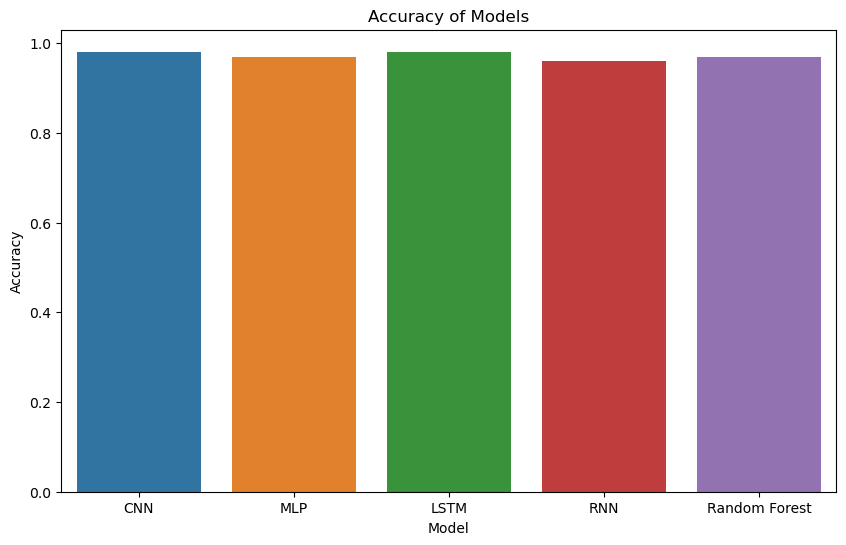

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df)
plt.title('Accuracy of Models')
plt.ylabel('Accuracy')
plt.savefig('accuracy.png')
plt.show()

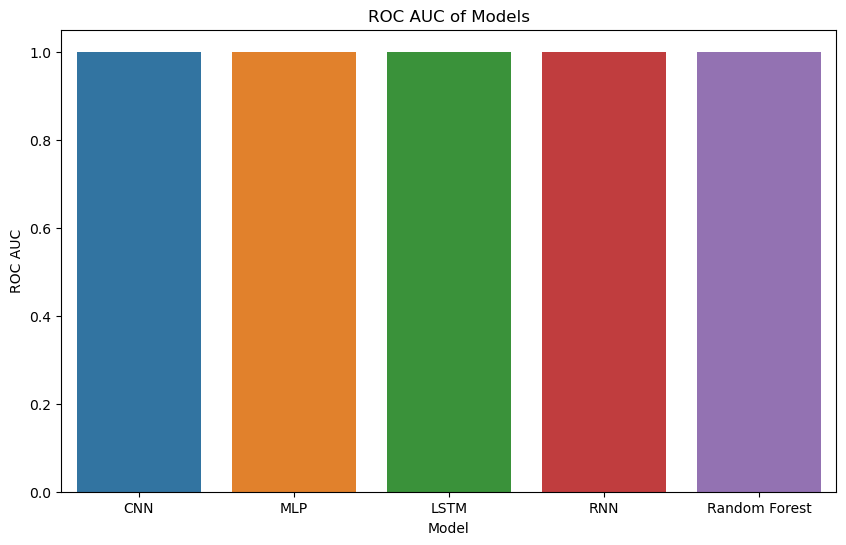

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='ROC AUC', data=metrics_df)
plt.title('ROC AUC of Models')
plt.ylabel('ROC AUC')
plt.savefig('roc_auc.png')
plt.show()


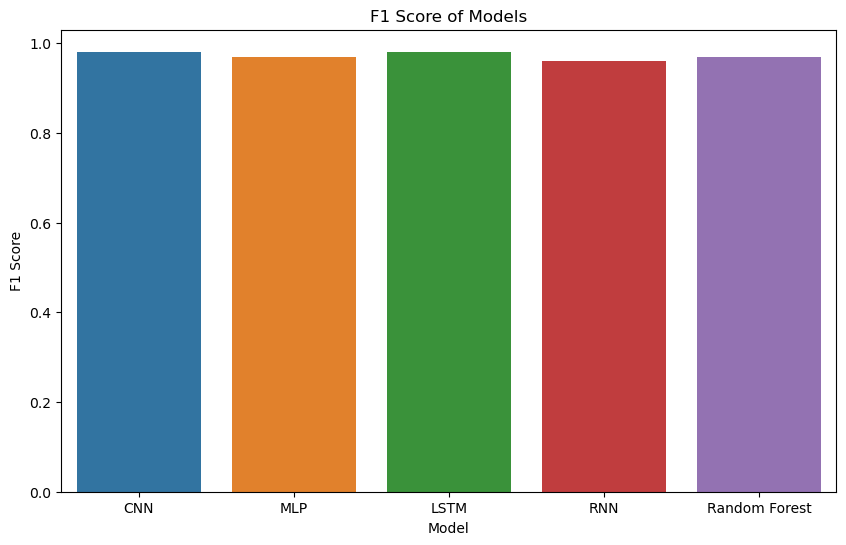

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='F1 Score', data=metrics_df)
plt.title('F1 Score of Models')
plt.ylabel('F1 Score')
plt.savefig('f1_score.png')
plt.show()


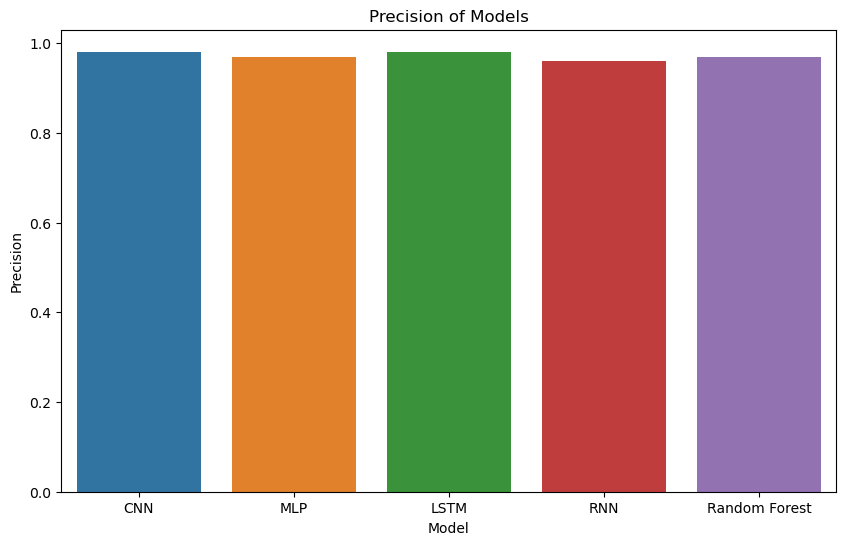

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Precision', data=metrics_df)
plt.title('Precision of Models')
plt.ylabel('Precision')
plt.savefig('precision.png')
plt.show()


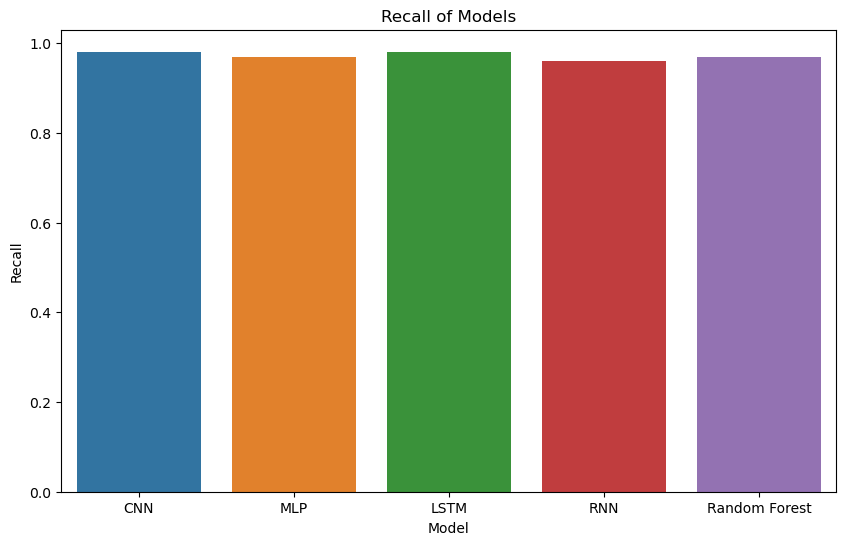

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Recall', data=metrics_df)
plt.title('Recall of Models')
plt.ylabel('Recall')
plt.savefig('recall.png')
plt.show()


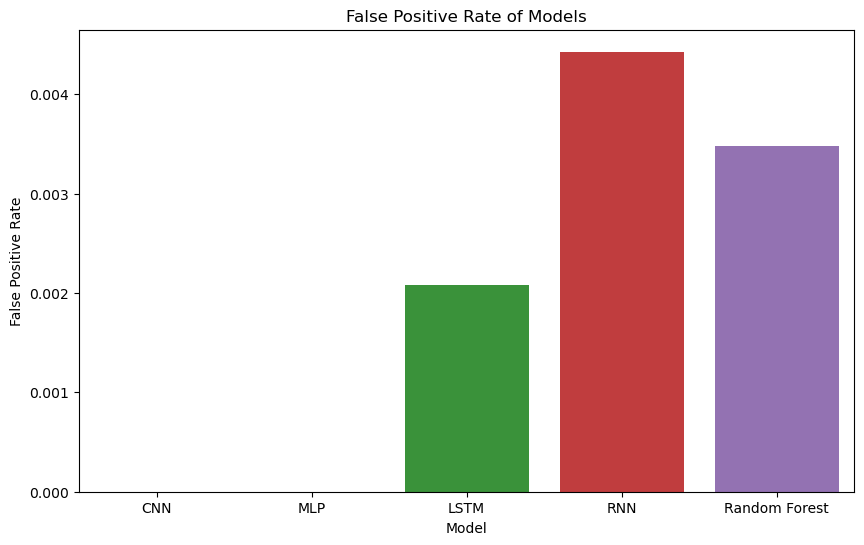

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='False Positive Rate (FPR)', data=metrics_df)
plt.title('False Positive Rate of Models')
plt.ylabel('False Positive Rate')
plt.savefig('fpr.png')
plt.show()


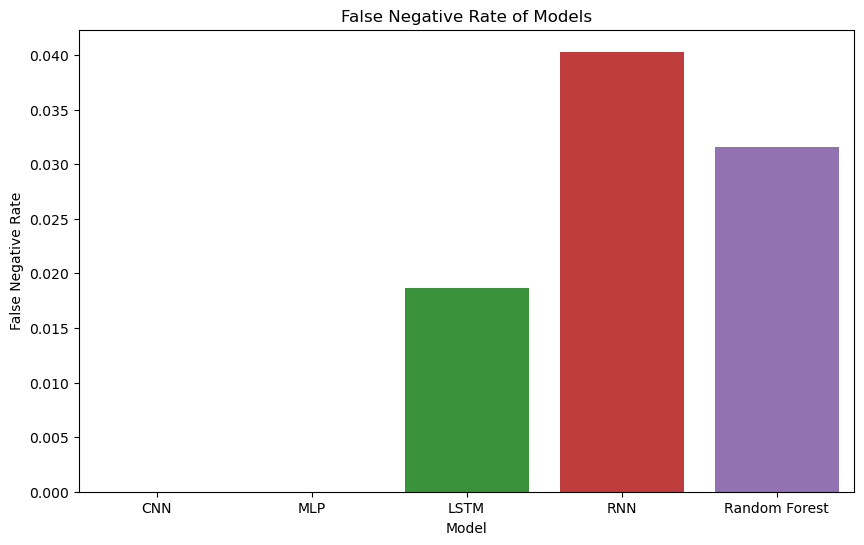

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='False Negative Rate (FNR)', data=metrics_df)
plt.title('False Negative Rate of Models')
plt.ylabel('False Negative Rate')
plt.savefig('fnr.png')
plt.show()


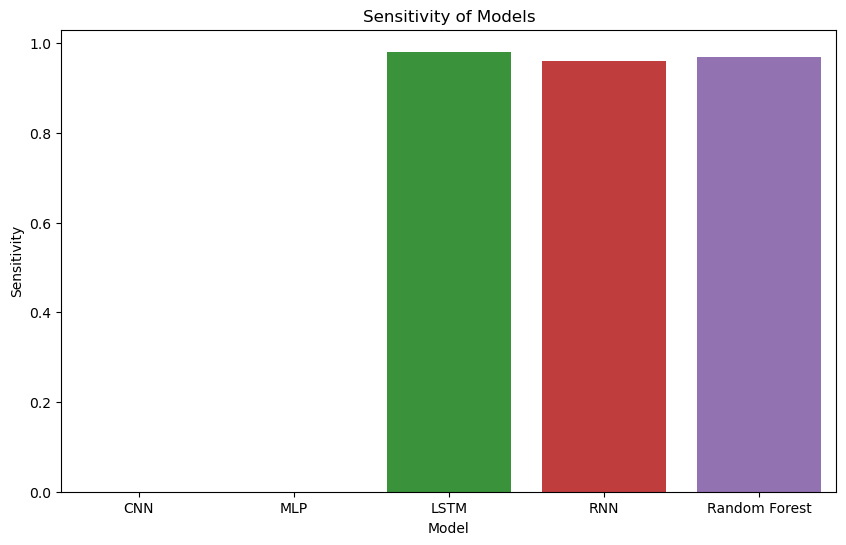

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Sensitivity', data=metrics_df)
plt.title('Sensitivity of Models')
plt.ylabel('Sensitivity')
plt.savefig('sensitivity.png')
plt.show()


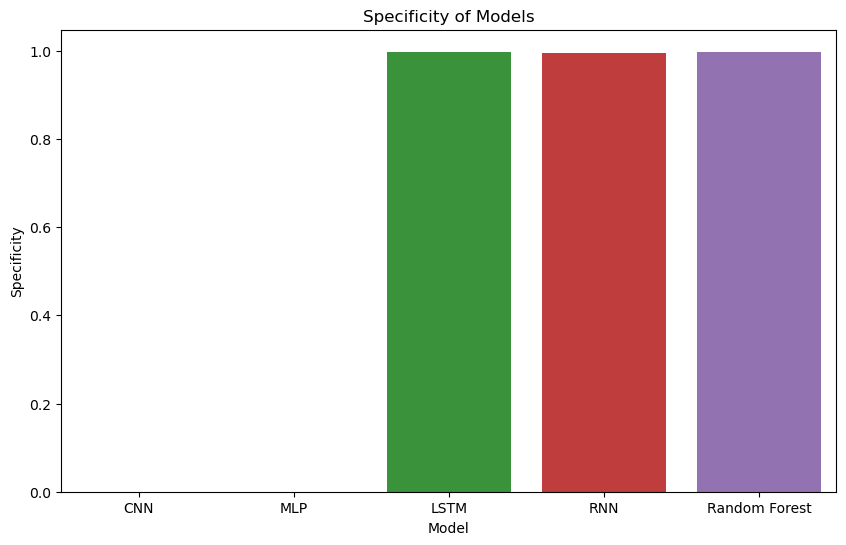

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Specificity', data=metrics_df)
plt.title('Specificity of Models')
plt.ylabel('Specificity')
plt.savefig('specificity.png')
plt.show()


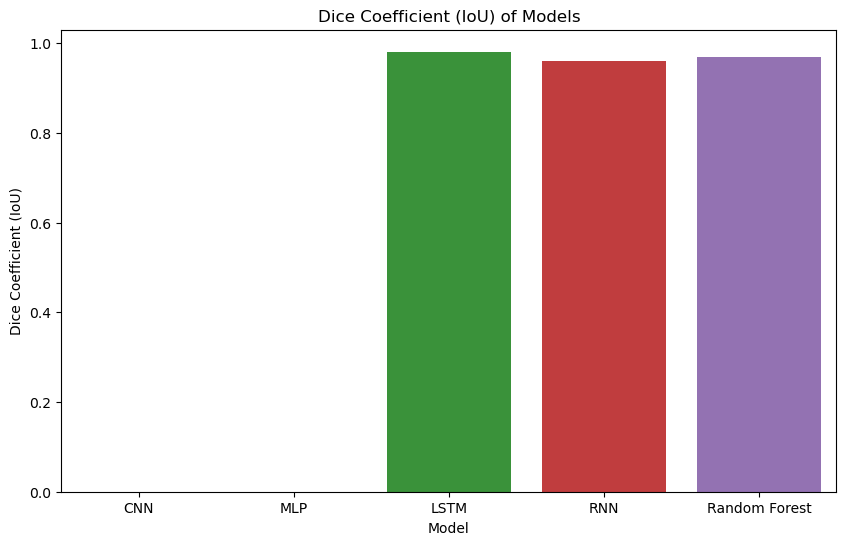

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='Dice Coefficient (IoU)', data=metrics_df)
plt.title('Dice Coefficient (IoU) of Models')
plt.ylabel('Dice Coefficient (IoU)')
plt.savefig('dice_coefficient.png')
plt.show()
